# ML-model initialisation and execution

In [1]:
from copro import utils, pipeline, evaluation, plots

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sbs
import os, sys
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")

For better reproducibility, the version numbers of all key packages are provided.

In [2]:
utils.show_versions()

Python version: 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 01:53:57) [MSC v.1916 64 bit (AMD64)]
copro version: 0.0.5
geopandas version: 0.8.0
xarray version: 0.15.1
rasterio version: 1.1.0
pandas version: 1.0.3
numpy version: 1.18.1
scikit-learn version: 0.23.2
matplotlib version: 3.2.1
seaborn version: 0.11.0
rasterstats version: 0.14.0


## Read pre-computed XY-data

In the cfg-file, all the settings for the analysis are defined. By 'parsing' (i.e. reading) it, all settings and file paths are known to the model. This is a simple way to make the code independent of the input data and settings.

In [3]:
settings_file = 'example_settings.cfg'

Based on this cfg-file, the set-up of the run can be initialized. One part of the cfg-file is the specification and creation of an output folder.

In [4]:
config, out_dir = utils.initiate_setup(settings_file)

saving output to folder C:\Users\hoch0001\Documents\_code\copro\example\OUT

no conflict file was specified, hence downloading data from http://ucdp.uu.se/downloads/ged/ged201-csv.zip to C:\Users\hoch0001\Documents\_code\copro\example\example_data\UCDP\ged201-csv.zip



Since no XY-data is specified in the config-file initially, we have to set this manually.

In [5]:
config.set('pre_calc', 'XY', str(os.path.join(os.path.abspath(config.get('general', 'input_dir')), 'XY.npy')))

See if the right path pops up:

In [6]:
config.get('pre_calc', 'XY')

'C:\\Users\\hoch0001\\Documents\\_code\\copro\\example\\example_data\\XY.npy'

Now that this is taken care of, we also need to load in the data from the very first notebook.

In [7]:
conflict_gdf = gpd.read_file(os.path.join(out_dir, 'selected_conflicts.shp'))
selected_polygons_gdf = gpd.read_file(os.path.join(out_dir, 'selected_polygons.shp'))

Again, for the conversion from numpy array to dataframe this requires a few more steps.

In [8]:
global_arr = np.load(os.path.join(out_dir, 'global_df.npy'), allow_pickle=True)
global_df = pd.DataFrame(data=global_arr, columns=['geometry', 'ID'])
global_df.set_index(global_df.ID, inplace=True)
global_df.drop(['ID'] , axis=1, inplace=True)

The scence is set now and we can compute the X-array and Y-array in no time!

In [9]:
X, Y = pipeline.create_XY(config, conflict_gdf, selected_polygons_gdf)

loading XY data from file C:\Users\hoch0001\Documents\_code\copro\example\example_data\XY.npy

number of data points including missing values: 4110
number of data points excluding missing values: 4005
from this, 619 points are equal to 1, i.e. represent conflict occurence. This is a fraction of 15.46 percent.


## Scaler and classifier

In [10]:
scaler, clf = pipeline.prepare_ML(config)

chosen scaling method is QuantileTransformer()
chosen ML model is RandomForestClassifier(class_weight={1: 100}, n_estimators=1000)


## Output initialization

Since the model is run multiple times, we need to initialize some stuff first to append the output per run.

In [11]:
out_X_df = evaluation.init_out_df()
out_y_df = evaluation.init_out_df()

In [12]:
out_dict = evaluation.init_out_dict()

In [13]:
trps, aucs, mean_fpr = evaluation.init_out_ROC_curve()

## ML-model execution

The pudels kern! This is where the magic happens, and not only once. Due make sure that any conincidental results are ruled out, we run the model multiple times. Thereby, always different samples are used for training and prediction. By using a sufficient number of runs and averaging the overall results, we should be able to get a good picture of what the model is capable of.

The main evaluation metric is the mean ROC-score and [**ROC-curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html), plotted at the end of all runs.

run 1 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.846
Precision: 0.477
Recall: 0.289
F1 score: 0.360
Brier loss score: 0.107
Cohen-Kappa score: 0.278
ROC AUC score 0.813

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1022
           1       0.48      0.29      0.36       180

    accuracy                           0.85      1202
   macro avg       0.68      0.62      0.64      1202
weighted avg       0.82      0.85      0.83      1202




No handles with labels found to put in legend.


run 2 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.858
Precision: 0.593
Recall: 0.273
F1 score: 0.374
Brier loss score: 0.107
Cohen-Kappa score: 0.306
ROC AUC score 0.820

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1015
           1       0.59      0.27      0.37       187

    accuracy                           0.86      1202
   macro avg       0.74      0.62      0.65      1202
weighted avg       0.83      0.86      0.83      1202




No handles with labels found to put in legend.


run 3 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.846
Precision: 0.514
Recall: 0.203
F1 score: 0.291
Brier loss score: 0.108
Cohen-Kappa score: 0.223
ROC AUC score 0.807

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1015
           1       0.51      0.20      0.29       187

    accuracy                           0.85      1202
   macro avg       0.69      0.58      0.60      1202
weighted avg       0.81      0.85      0.82      1202




No handles with labels found to put in legend.


run 4 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.851
Precision: 0.543
Recall: 0.273
F1 score: 0.363
Brier loss score: 0.113
Cohen-Kappa score: 0.289
ROC AUC score 0.797

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1015
           1       0.54      0.27      0.36       187

    accuracy                           0.85      1202
   macro avg       0.71      0.62      0.64      1202
weighted avg       0.83      0.85      0.83      1202




No handles with labels found to put in legend.


run 5 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.857
Precision: 0.546
Recall: 0.293
F1 score: 0.381
Brier loss score: 0.102
Cohen-Kappa score: 0.309
ROC AUC score 0.828

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1021
           1       0.55      0.29      0.38       181

    accuracy                           0.86      1202
   macro avg       0.72      0.62      0.65      1202
weighted avg       0.83      0.86      0.84      1202




No handles with labels found to put in legend.


run 6 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.840
Precision: 0.549
Recall: 0.277
F1 score: 0.368
Brier loss score: 0.117
Cohen-Kappa score: 0.288
ROC AUC score 0.817

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1000
           1       0.55      0.28      0.37       202

    accuracy                           0.84      1202
   macro avg       0.71      0.62      0.64      1202
weighted avg       0.81      0.84      0.82      1202




No handles with labels found to put in legend.


run 7 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.856
Precision: 0.534
Recall: 0.263
F1 score: 0.352
Brier loss score: 0.106
Cohen-Kappa score: 0.282
ROC AUC score 0.803

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1023
           1       0.53      0.26      0.35       179

    accuracy                           0.86      1202
   macro avg       0.71      0.61      0.64      1202
weighted avg       0.83      0.86      0.83      1202




No handles with labels found to put in legend.


run 8 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.862
Precision: 0.548
Recall: 0.291
F1 score: 0.381
Brier loss score: 0.099
Cohen-Kappa score: 0.311
ROC AUC score 0.837

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1027
           1       0.55      0.29      0.38       175

    accuracy                           0.86      1202
   macro avg       0.72      0.63      0.65      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 9 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.855
Precision: 0.608
Recall: 0.251
F1 score: 0.356
Brier loss score: 0.106
Cohen-Kappa score: 0.289
ROC AUC score 0.832

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1011
           1       0.61      0.25      0.36       191

    accuracy                           0.86      1202
   macro avg       0.74      0.61      0.64      1202
weighted avg       0.83      0.86      0.83      1202




No handles with labels found to put in legend.


run 10 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.859
Precision: 0.494
Recall: 0.249
F1 score: 0.331
Brier loss score: 0.101
Cohen-Kappa score: 0.261
ROC AUC score 0.821

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1033
           1       0.49      0.25      0.33       169

    accuracy                           0.86      1202
   macro avg       0.69      0.60      0.63      1202
weighted avg       0.83      0.86      0.84      1202




No handles with labels found to put in legend.


run 11 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.849
Precision: 0.510
Recall: 0.266
F1 score: 0.350
Brier loss score: 0.107
Cohen-Kappa score: 0.274
ROC AUC score 0.824

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1018
           1       0.51      0.27      0.35       184

    accuracy                           0.85      1202
   macro avg       0.69      0.61      0.63      1202
weighted avg       0.82      0.85      0.83      1202




No handles with labels found to put in legend.


run 12 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.851
Precision: 0.595
Recall: 0.242
F1 score: 0.344
Brier loss score: 0.114
Cohen-Kappa score: 0.277
ROC AUC score 0.799

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1008
           1       0.59      0.24      0.34       194

    accuracy                           0.85      1202
   macro avg       0.73      0.61      0.63      1202
weighted avg       0.82      0.85      0.82      1202




No handles with labels found to put in legend.


run 13 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.844
Precision: 0.581
Recall: 0.248
F1 score: 0.347
Brier loss score: 0.117
Cohen-Kappa score: 0.274
ROC AUC score 0.805

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1000
           1       0.58      0.25      0.35       202

    accuracy                           0.84      1202
   macro avg       0.72      0.61      0.63      1202
weighted avg       0.82      0.84      0.82      1202




No handles with labels found to put in legend.


run 14 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.860
Precision: 0.593
Recall: 0.277
F1 score: 0.378
Brier loss score: 0.102
Cohen-Kappa score: 0.311
ROC AUC score 0.832

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1018
           1       0.59      0.28      0.38       184

    accuracy                           0.86      1202
   macro avg       0.74      0.62      0.65      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 15 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.852
Precision: 0.513
Recall: 0.217
F1 score: 0.305
Brier loss score: 0.107
Cohen-Kappa score: 0.237
ROC AUC score 0.811

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1022
           1       0.51      0.22      0.30       180

    accuracy                           0.85      1202
   macro avg       0.69      0.59      0.61      1202
weighted avg       0.82      0.85      0.83      1202




No handles with labels found to put in legend.


run 16 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.859
Precision: 0.571
Recall: 0.284
F1 score: 0.380
Brier loss score: 0.106
Cohen-Kappa score: 0.310
ROC AUC score 0.817

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1019
           1       0.57      0.28      0.38       183

    accuracy                           0.86      1202
   macro avg       0.73      0.62      0.65      1202
weighted avg       0.83      0.86      0.84      1202




No handles with labels found to put in legend.


run 17 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.855
Precision: 0.522
Recall: 0.264
F1 score: 0.351
Brier loss score: 0.102
Cohen-Kappa score: 0.279
ROC AUC score 0.835

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1024
           1       0.52      0.26      0.35       178

    accuracy                           0.86      1202
   macro avg       0.70      0.61      0.63      1202
weighted avg       0.83      0.86      0.83      1202




No handles with labels found to put in legend.


run 18 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.862
Precision: 0.558
Recall: 0.273
F1 score: 0.366
Brier loss score: 0.105
Cohen-Kappa score: 0.299
ROC AUC score 0.810

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1026
           1       0.56      0.27      0.37       176

    accuracy                           0.86      1202
   macro avg       0.72      0.62      0.64      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 19 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.854
Precision: 0.568
Recall: 0.266
F1 score: 0.362
Brier loss score: 0.109
Cohen-Kappa score: 0.292
ROC AUC score 0.817

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1014
           1       0.57      0.27      0.36       188

    accuracy                           0.85      1202
   macro avg       0.72      0.61      0.64      1202
weighted avg       0.83      0.85      0.83      1202




No handles with labels found to put in legend.


run 20 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.853
Precision: 0.608
Recall: 0.312
F1 score: 0.412
Brier loss score: 0.109
Cohen-Kappa score: 0.338
ROC AUC score 0.828

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1003
           1       0.61      0.31      0.41       199

    accuracy                           0.85      1202
   macro avg       0.74      0.64      0.66      1202
weighted avg       0.83      0.85      0.83      1202




No handles with labels found to put in legend.


run 21 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.864
Precision: 0.624
Recall: 0.312
F1 score: 0.416
Brier loss score: 0.100
Cohen-Kappa score: 0.349
ROC AUC score 0.846

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1016
           1       0.62      0.31      0.42       186

    accuracy                           0.86      1202
   macro avg       0.75      0.64      0.67      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 22 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.875
Precision: 0.533
Recall: 0.314
F1 score: 0.395
Brier loss score: 0.093
Cohen-Kappa score: 0.331
ROC AUC score 0.825

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1046
           1       0.53      0.31      0.40       156

    accuracy                           0.88      1202
   macro avg       0.72      0.64      0.66      1202
weighted avg       0.86      0.88      0.86      1202




No handles with labels found to put in legend.


run 23 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.861
Precision: 0.671
Recall: 0.291
F1 score: 0.406
Brier loss score: 0.106
Cohen-Kappa score: 0.341
ROC AUC score 0.827

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1006
           1       0.67      0.29      0.41       196

    accuracy                           0.86      1202
   macro avg       0.77      0.63      0.66      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 24 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.859
Precision: 0.558
Recall: 0.293
F1 score: 0.384
Brier loss score: 0.104
Cohen-Kappa score: 0.313
ROC AUC score 0.818

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1021
           1       0.56      0.29      0.38       181

    accuracy                           0.86      1202
   macro avg       0.72      0.63      0.65      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 25 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.854
Precision: 0.568
Recall: 0.287
F1 score: 0.382
Brier loss score: 0.108
Cohen-Kappa score: 0.309
ROC AUC score 0.820

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1014
           1       0.57      0.29      0.38       188

    accuracy                           0.85      1202
   macro avg       0.72      0.62      0.65      1202
weighted avg       0.83      0.85      0.83      1202




No handles with labels found to put in legend.


run 26 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.863
Precision: 0.552
Recall: 0.303
F1 score: 0.391
Brier loss score: 0.103
Cohen-Kappa score: 0.321
ROC AUC score 0.805

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1027
           1       0.55      0.30      0.39       175

    accuracy                           0.86      1202
   macro avg       0.72      0.63      0.66      1202
weighted avg       0.84      0.86      0.85      1202




No handles with labels found to put in legend.


run 27 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.859
Precision: 0.517
Recall: 0.260
F1 score: 0.346
Brier loss score: 0.101
Cohen-Kappa score: 0.276
ROC AUC score 0.817

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1029
           1       0.52      0.26      0.35       173

    accuracy                           0.86      1202
   macro avg       0.70      0.61      0.63      1202
weighted avg       0.83      0.86      0.84      1202




No handles with labels found to put in legend.


run 28 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.852
Precision: 0.540
Recall: 0.254
F1 score: 0.346
Brier loss score: 0.106
Cohen-Kappa score: 0.274
ROC AUC score 0.814

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1017
           1       0.54      0.25      0.35       185

    accuracy                           0.85      1202
   macro avg       0.71      0.61      0.63      1202
weighted avg       0.82      0.85      0.83      1202




No handles with labels found to put in legend.


run 29 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.838
Precision: 0.584
Recall: 0.216
F1 score: 0.316
Brier loss score: 0.114
Cohen-Kappa score: 0.245
ROC AUC score 0.819

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       994
           1       0.58      0.22      0.32       208

    accuracy                           0.84      1202
   macro avg       0.72      0.59      0.61      1202
weighted avg       0.81      0.84      0.81      1202




No handles with labels found to put in legend.


run 30 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.852
Precision: 0.547
Recall: 0.253
F1 score: 0.346
Brier loss score: 0.104
Cohen-Kappa score: 0.275
ROC AUC score 0.831

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1016
           1       0.55      0.25      0.35       186

    accuracy                           0.85      1202
   macro avg       0.71      0.61      0.63      1202
weighted avg       0.82      0.85      0.83      1202




No handles with labels found to put in legend.


run 31 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.857
Precision: 0.495
Recall: 0.263
F1 score: 0.344
Brier loss score: 0.106
Cohen-Kappa score: 0.272
ROC AUC score 0.801

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1031
           1       0.49      0.26      0.34       171

    accuracy                           0.86      1202
   macro avg       0.69      0.61      0.63      1202
weighted avg       0.83      0.86      0.84      1202




No handles with labels found to put in legend.


run 32 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.842
Precision: 0.556
Recall: 0.250
F1 score: 0.345
Brier loss score: 0.112
Cohen-Kappa score: 0.269
ROC AUC score 0.813

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1002
           1       0.56      0.25      0.34       200

    accuracy                           0.84      1202
   macro avg       0.71      0.61      0.63      1202
weighted avg       0.81      0.84      0.82      1202




No handles with labels found to put in legend.


run 33 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.869
Precision: 0.670
Recall: 0.314
F1 score: 0.428
Brier loss score: 0.104
Cohen-Kappa score: 0.364
ROC AUC score 0.827

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1014
           1       0.67      0.31      0.43       188

    accuracy                           0.87      1202
   macro avg       0.78      0.64      0.68      1202
weighted avg       0.85      0.87      0.85      1202




No handles with labels found to put in legend.


run 34 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.855
Precision: 0.530
Recall: 0.246
F1 score: 0.336
Brier loss score: 0.106
Cohen-Kappa score: 0.267
ROC AUC score 0.801

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1023
           1       0.53      0.25      0.34       179

    accuracy                           0.86      1202
   macro avg       0.70      0.60      0.63      1202
weighted avg       0.83      0.86      0.83      1202




No handles with labels found to put in legend.


run 35 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.839
Precision: 0.547
Recall: 0.234
F1 score: 0.328
Brier loss score: 0.116
Cohen-Kappa score: 0.253
ROC AUC score 0.811

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1001
           1       0.55      0.23      0.33       201

    accuracy                           0.84      1202
   macro avg       0.70      0.60      0.62      1202
weighted avg       0.81      0.84      0.81      1202




No handles with labels found to put in legend.


run 36 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.874
Precision: 0.640
Recall: 0.314
F1 score: 0.421
Brier loss score: 0.098
Cohen-Kappa score: 0.360
ROC AUC score 0.826

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1027
           1       0.64      0.31      0.42       175

    accuracy                           0.87      1202
   macro avg       0.77      0.64      0.68      1202
weighted avg       0.86      0.87      0.86      1202




No handles with labels found to put in legend.


run 37 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.858
Precision: 0.544
Recall: 0.274
F1 score: 0.364
Brier loss score: 0.098
Cohen-Kappa score: 0.294
ROC AUC score 0.844

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1023
           1       0.54      0.27      0.36       179

    accuracy                           0.86      1202
   macro avg       0.71      0.62      0.64      1202
weighted avg       0.83      0.86      0.84      1202




No handles with labels found to put in legend.


run 38 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.845
Precision: 0.556
Recall: 0.255
F1 score: 0.350
Brier loss score: 0.111
Cohen-Kappa score: 0.275
ROC AUC score 0.815

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1006
           1       0.56      0.26      0.35       196

    accuracy                           0.85      1202
   macro avg       0.71      0.61      0.63      1202
weighted avg       0.82      0.85      0.82      1202




No handles with labels found to put in legend.


run 39 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.852
Precision: 0.457
Recall: 0.186
F1 score: 0.264
Brier loss score: 0.104
Cohen-Kappa score: 0.198
ROC AUC score 0.823

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1030
           1       0.46      0.19      0.26       172

    accuracy                           0.85      1202
   macro avg       0.67      0.57      0.59      1202
weighted avg       0.82      0.85      0.82      1202




No handles with labels found to put in legend.


run 40 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.839
Precision: 0.511
Recall: 0.230
F1 score: 0.317
Brier loss score: 0.110
Cohen-Kappa score: 0.240
ROC AUC score 0.833

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1006
           1       0.51      0.23      0.32       196

    accuracy                           0.84      1202
   macro avg       0.69      0.59      0.61      1202
weighted avg       0.81      0.84      0.81      1202




No handles with labels found to put in legend.


run 41 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.853
Precision: 0.582
Recall: 0.242
F1 score: 0.342
Brier loss score: 0.101
Cohen-Kappa score: 0.275
ROC AUC score 0.849

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1012
           1       0.58      0.24      0.34       190

    accuracy                           0.85      1202
   macro avg       0.73      0.60      0.63      1202
weighted avg       0.83      0.85      0.83      1202




No handles with labels found to put in legend.


run 42 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.856
Precision: 0.562
Recall: 0.246
F1 score: 0.342
Brier loss score: 0.107
Cohen-Kappa score: 0.275
ROC AUC score 0.808

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1019
           1       0.56      0.25      0.34       183

    accuracy                           0.86      1202
   macro avg       0.72      0.61      0.63      1202
weighted avg       0.83      0.86      0.83      1202




No handles with labels found to put in legend.


run 43 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.848
Precision: 0.509
Recall: 0.308
F1 score: 0.384
Brier loss score: 0.109
Cohen-Kappa score: 0.303
ROC AUC score 0.811

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1017
           1       0.51      0.31      0.38       185

    accuracy                           0.85      1202
   macro avg       0.70      0.63      0.65      1202
weighted avg       0.83      0.85      0.83      1202




No handles with labels found to put in legend.


run 44 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.862
Precision: 0.578
Recall: 0.268
F1 score: 0.366
Brier loss score: 0.105
Cohen-Kappa score: 0.300
ROC AUC score 0.812

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1023
           1       0.58      0.27      0.37       179

    accuracy                           0.86      1202
   macro avg       0.73      0.62      0.64      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 45 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.836
Precision: 0.550
Recall: 0.266
F1 score: 0.358
Brier loss score: 0.119
Cohen-Kappa score: 0.277
ROC AUC score 0.814

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       995
           1       0.55      0.27      0.36       207

    accuracy                           0.84      1202
   macro avg       0.71      0.61      0.63      1202
weighted avg       0.81      0.84      0.81      1202




No handles with labels found to put in legend.


run 46 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.846
Precision: 0.573
Recall: 0.258
F1 score: 0.355
Brier loss score: 0.105
Cohen-Kappa score: 0.282
ROC AUC score 0.838

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1004
           1       0.57      0.26      0.36       198

    accuracy                           0.85      1202
   macro avg       0.72      0.61      0.63      1202
weighted avg       0.82      0.85      0.82      1202




No handles with labels found to put in legend.


run 47 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.864
Precision: 0.588
Recall: 0.331
F1 score: 0.424
Brier loss score: 0.104
Cohen-Kappa score: 0.354
ROC AUC score 0.803

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1021
           1       0.59      0.33      0.42       181

    accuracy                           0.86      1202
   macro avg       0.74      0.65      0.67      1202
weighted avg       0.84      0.86      0.85      1202




No handles with labels found to put in legend.


run 48 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.864
Precision: 0.584
Recall: 0.254
F1 score: 0.354
Brier loss score: 0.104
Cohen-Kappa score: 0.291
ROC AUC score 0.812

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1025
           1       0.58      0.25      0.35       177

    accuracy                           0.86      1202
   macro avg       0.73      0.61      0.64      1202
weighted avg       0.84      0.86      0.84      1202




No handles with labels found to put in legend.


run 49 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.851
Precision: 0.466
Recall: 0.279
F1 score: 0.349
Brier loss score: 0.109
Cohen-Kappa score: 0.271
ROC AUC score 0.803

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1030
           1       0.47      0.28      0.35       172

    accuracy                           0.85      1202
   macro avg       0.68      0.61      0.63      1202
weighted avg       0.83      0.85      0.83      1202




No handles with labels found to put in legend.


run 50 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.859
Precision: 0.593
Recall: 0.261
F1 score: 0.362
Brier loss score: 0.105
Cohen-Kappa score: 0.296
ROC AUC score 0.830

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1018
           1       0.59      0.26      0.36       184

    accuracy                           0.86      1202
   macro avg       0.74      0.61      0.64      1202
weighted avg       0.83      0.86      0.84      1202




No handles with labels found to put in legend.


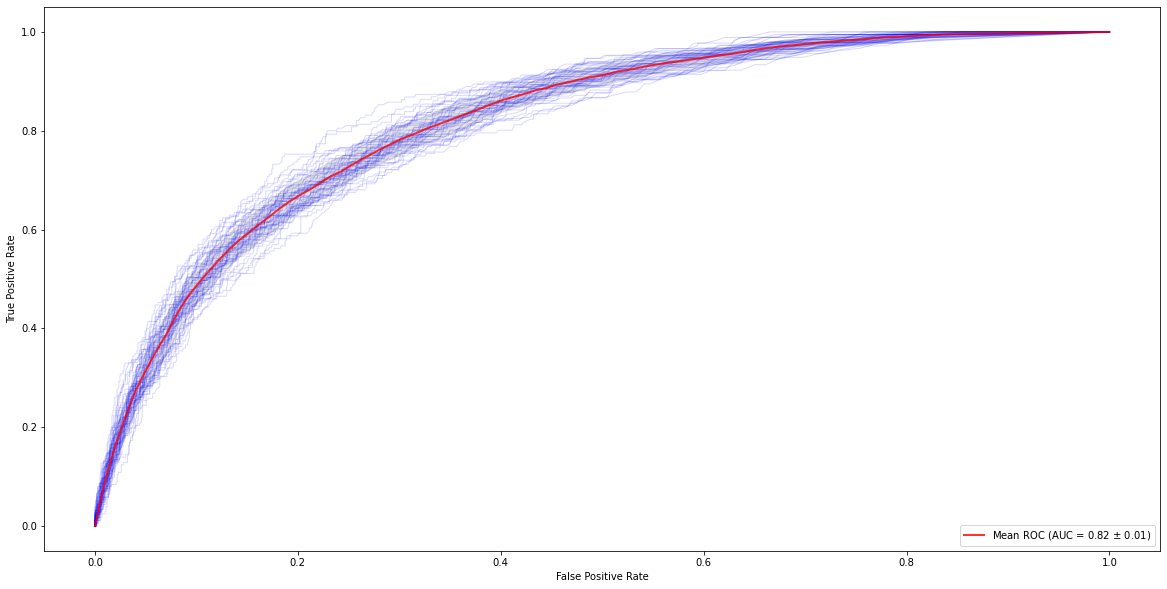

In [14]:
# #- create plot instance
fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

#- go through all n model executions
for n in range(config.getint('settings', 'n_runs')):
    
    if config.getboolean('general', 'verbose'):
        print('run {} of {}'.format(n+1, config.getint('settings', 'n_runs')) + os.linesep)

    #- run machine learning model and return outputs
    X_df, y_df, eval_dict = pipeline.run(X, Y, config, scaler, clf, out_dir)
    
    #- select sub-dataset with only datapoints with observed conflicts
    X1_df, y1_df = utils.get_conflict_datapoints_only(X_df, y_df)
    
    #- append per model execution
    out_X_df = evaluation.fill_out_df(out_X_df, X_df)
    out_y_df = evaluation.fill_out_df(out_y_df, y_df)
    out_dict = evaluation.fill_out_dict(out_dict, eval_dict)

    #- plot ROC curve per model execution
    tprs, aucs = plots.plot_ROC_curve_n_times(ax1, clf, X_df.to_numpy(), y_df.y_test.to_list(),
                                                                  trps, aucs, mean_fpr)

#- plot mean ROC curve
plots.plot_ROC_curve_n_mean(ax1, tprs, aucs, mean_fpr)

## Model evaluation

### For all data points

During the model runs, the computed model evaluation scores per model execution were stored to a dictionary. Currently, the evaluation scores used are:

* [**Accuracy**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): the fraction of correct predictions;
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): the ratio *tp / (tp + fp)* where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative;
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): the ratio *tp / (tp + fn)* where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples;
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): the F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0;
* [**Cohen-Kappa score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html): is used to measure inter-rater reliability. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.
* [**Brier score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html): the smaller the Brier score, the better, hence the naming with “loss”. The lower the Brier score is for a set of predictions, the better the predictions are calibrated. Note that the Brier loss score is relatively sensitive for imbalanced datasets;
* [**ROC score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html): a value of 0.5 suggests no skill, e.g. a curve along the diagonal, whereas a value of 1.0 suggests perfect skill, all points along the left y-axis and top x-axis toward the top left corner. A value of 0.0 suggests perfectly incorrect predictions. Note that the ROC score is relatively insensitive for imbalanced datasets.

Let's check the mean scores over all runs:

In [15]:
for key in out_dict:
    
    print('average {0} of run with {1} repetitions is {2:0.3f}'.format(key, config.getint('settings', 'n_runs'), np.mean(out_dict[key])))

average Accuracy of run with 50 repetitions is 0.854
average Precision of run with 50 repetitions is 0.556
average Recall of run with 50 repetitions is 0.267
average F1 score of run with 50 repetitions is 0.360
average Cohen-Kappa score of run with 50 repetitions is 0.289
average Brier loss score of run with 50 repetitions is 0.106
average ROC AUC score of run with 50 repetitions is 0.819


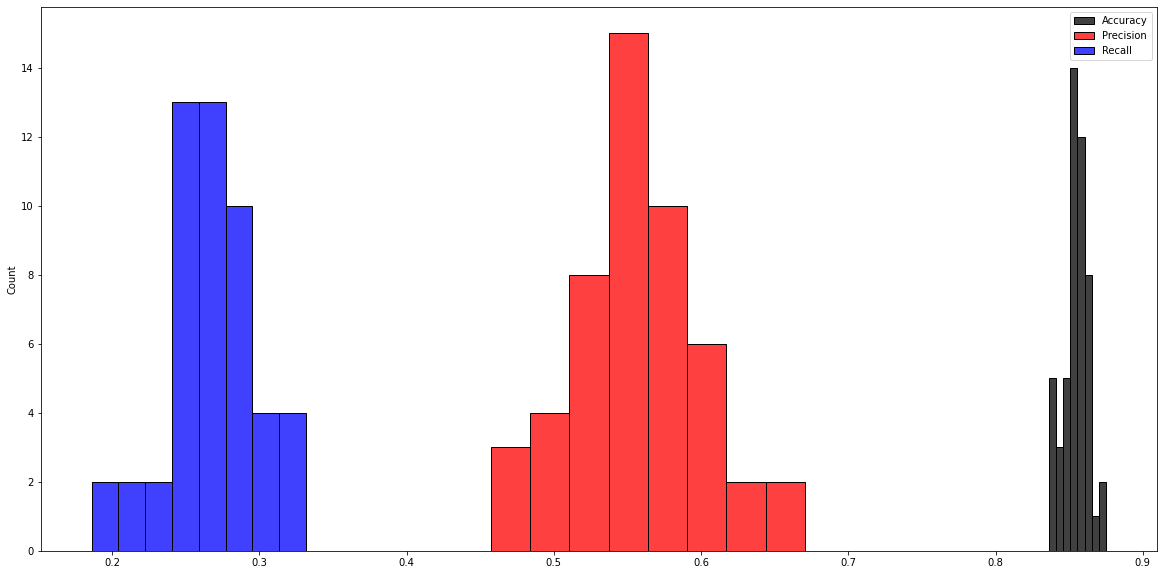

In [16]:
plots.metrics_distribution(out_dict, figsize=(20, 10));

Based on all data points, the [**confusion matrix**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) can be plotted. This is a relatively straightforward way to visualize how good the classifier values are predicted by the model.

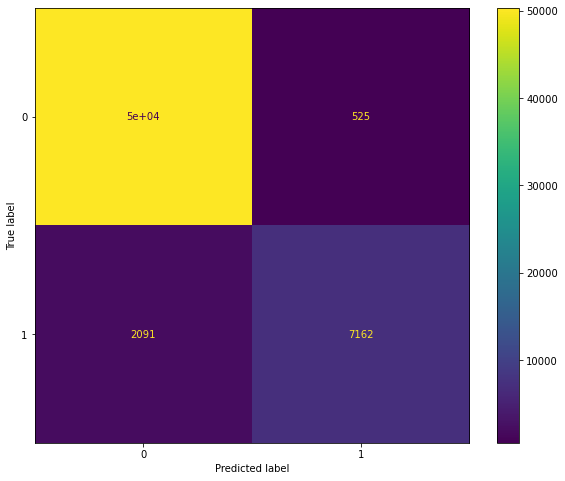

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
metrics.plot_confusion_matrix(clf, out_X_df.to_numpy(), out_y_df.y_test.to_list(), ax=ax);

### Per unique polygon

Thus far, we merely looked at numerical scores. This of course tells us a lot about the quality of the machine-learning model and its predictions, but not so much about how this looks like spatially. We therefore combine the observations and predictions made with the associated polygons based on a 'global' dataframe functioning as a look-up table. By this means, each model output can be connected to its polygon using a unique ID.

In [18]:
df_hit, gdf_hit = evaluation.polygon_model_accuracy(out_y_df, global_df, out_dir=None)

First, let's have a look at how often each polygon occurs in the all test samples, i.e. those obtained by appending the test samples per model execution. Besides, the overall relative distribution is visualized.

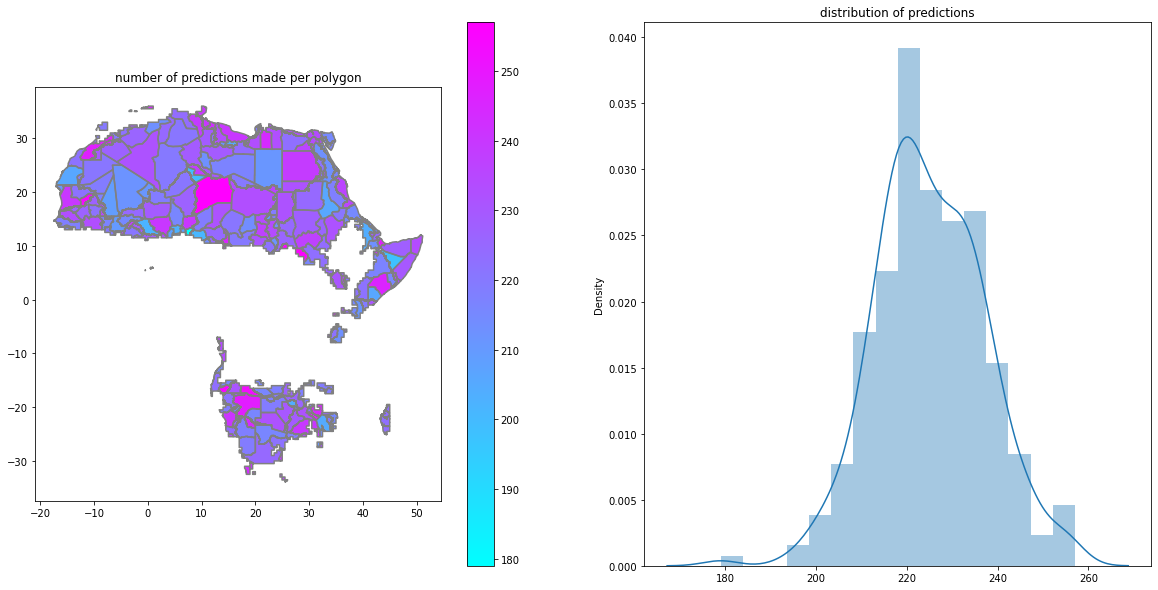

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
gdf_hit.plot(ax=ax1, column='ID_count', legend=True, cmap='cool')
selected_polygons_gdf.boundary.plot(ax=ax1, color='0.5')
ax1.set_title('number of predictions made per polygon')
sbs.distplot(df_hit.ID_count.values, ax=ax2)
ax2.set_title('distribution of predictions');

By repeating the model n times, the aim is to represent all polygons in the resulting test sample. The fraction is computed below. 

Note that is should be close to 100 % but may be slightly less. This can happen if input variables have no data for one polygon, leading to a removal of those polygons from the analysis. Or because some polygons and input data may not overlap.

In [20]:
print('{0:0.2f} % of all active polygons are considered in test sample'.format(len(gdf_hit)/len(selected_polygons_gdf)*100))

97.45 % of all active polygons are considered in test sample


By aggregating results per polygon, we can now assess model output spatially. Three main aspects are presented here:

1. The chance of a correct prediction, defined as the ratio of number of correct predictions made to overall number of predictions made;
2. The total number of conflicts in the test data;
3. The chance of conflict, defined as the ration of number of conflict predictions to overall number of predictions made.

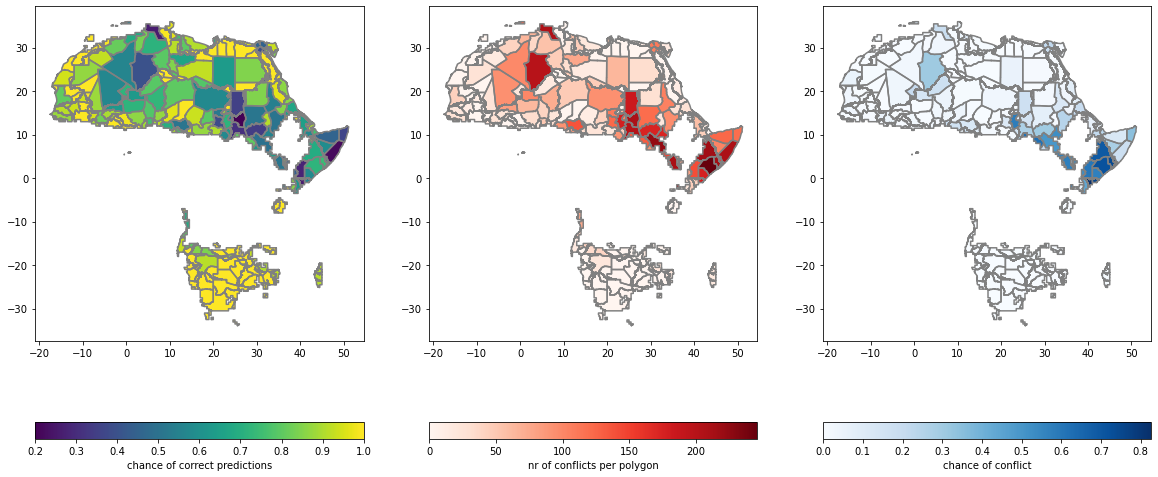

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
gdf_hit.plot(ax=ax1, column='chance_correct_pred', legend=True, 
             legend_kwds={'label': "chance of correct predictions", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax1, color='0.5')
gdf_hit.plot(ax=ax2, column='nr_test_confl', legend=True, cmap='Reds', 
             legend_kwds={'label': "nr of conflicts per polygon", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax2, color='0.5')
gdf_hit.plot(ax=ax3, column='chance_correct_confl_pred', legend=True, cmap='Blues', 
             legend_kwds={'label': "chance of conflict", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax3, color='0.5');

To get the variation of CCP (chance of corret prediction) per polygon, we split up the entire output data in 10 parts and calcualte mean, median, and standard deviation of CCP.

In [22]:
gdf_CCP = evaluation.calc_kFold_polygon_analysis(out_y_df, global_df, out_dir=None)

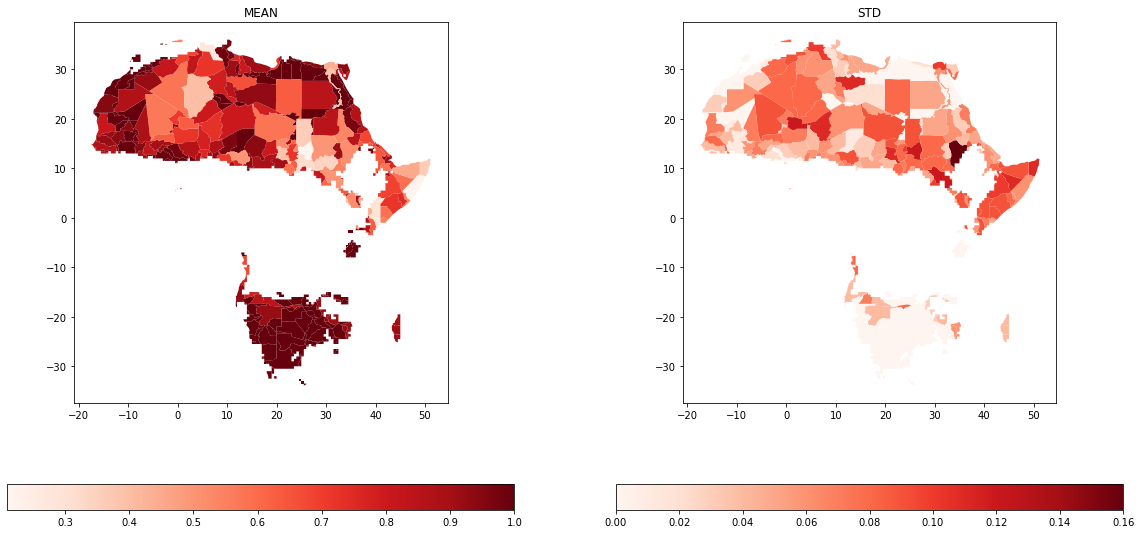

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
gdf_CCP.plot(column='mean_CCP', ax=ax1, cmap='Reds', legend=True, legend_kwds={'orientation': "horizontal"})
ax1.set_title('MEAN')
gdf_CCP.plot(column='std_CCP', ax=ax2, cmap='Reds', legend=True, legend_kwds={'orientation': "horizontal"})
ax2.set_title('STD');

To understand to what extent the model accuracy (i.e. hits) may depend on the number of predictions made per polygon or other factors, we plot some simple scatter plots.

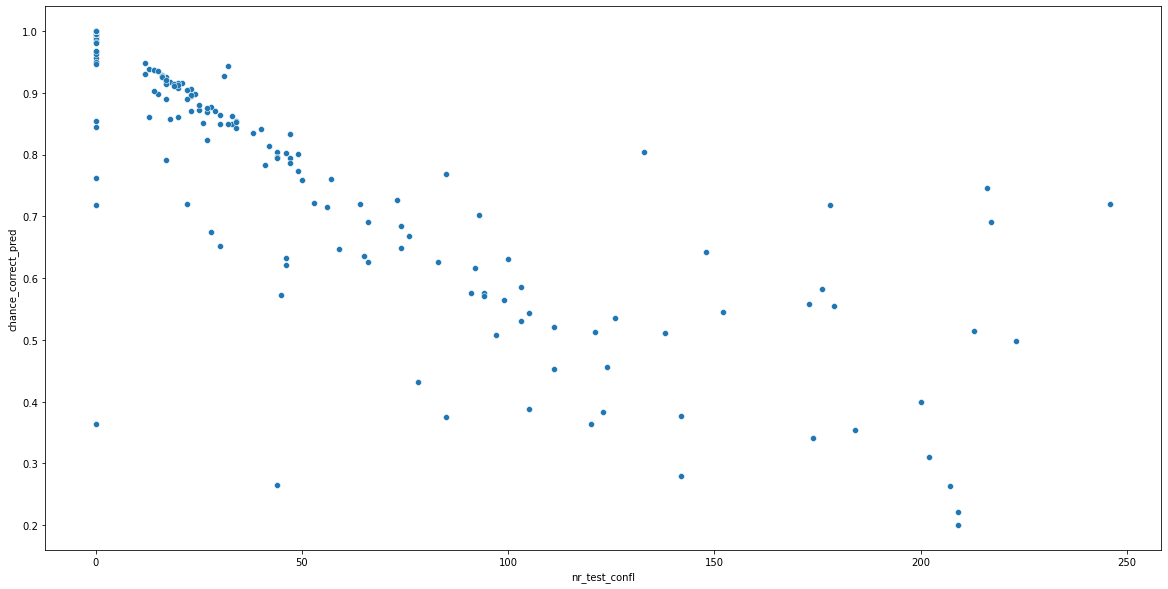

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sbs.scatterplot(data=df_hit, x='nr_test_confl', y='chance_correct_pred', ax=ax)

Up to know, we looked at two or more indicators of how the model performed and other statistical analyses per polygon. It's now time to come up with an indicator for which polygons we 'trust' the model.

Thus, we compute the median of the average hit accuracy of all polygons. This allows for dividing the polygons in the 50 % with an average hit accuracy above the median, and the other 50 % below it. These are our main categories:

* 'H': upper 50 % of average hit accuracy;
* 'L': lower 50 % of average hit accuracy.

In addition, we may want to know how this categorization depends on the number of conflicts in a polygon. For example, wich polygons have a high accuracy with lots of conflicts? For these polygons, we could assume that the model robustly succeeds in predicting conflict. To that end, we also compute the median number of conflicts per polygon.

This yields four sub-categories:

* 'HH': upper 50 % of average hit accuracy and upper 50 % of number of conflicts;
* 'HL': upper 50 % of average hit accuracy, but then with lower 50 % of number of conflicts;
* 'LH': lower 50 % of average hit accuracy and upper 50 % of number of conflicts;
* 'LL': lower 50 % of average hit accuracy, but then with lower 50 % of number of conflicts.

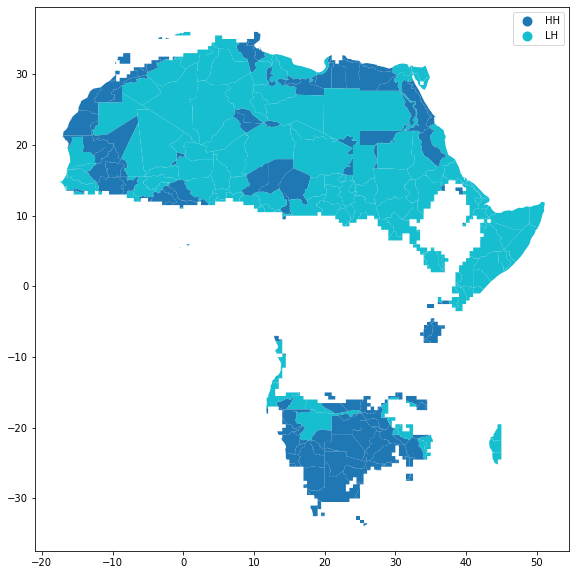

In [25]:
plots.polygon_categorization(gdf_hit, category='sub', figsize=(20, 10), legend=True);

Last, we can determine the relative importance of each feature, that is variable.

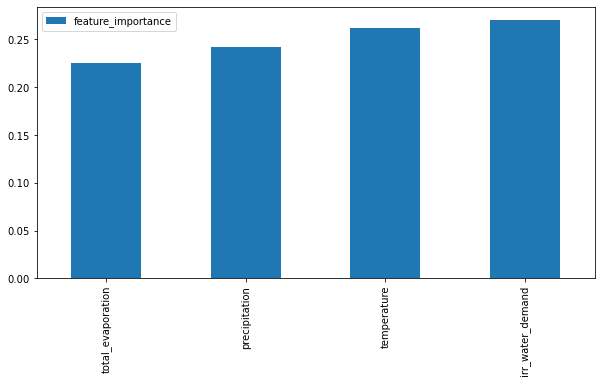

In [26]:
plots.factor_importance(clf, config, out_dir, figsize=(10, 5));